In [3]:
import matplotlib.pyplot as plt
from random import choice
import networkx as nx
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline

In [6]:
class SupplyChain():
    '''
    Simulate a supply chain from a directed tree graph. The flow
    of products between nodes is modeled to show how changes in 
    the type of garment--sustainable vs. unsustainable--change the 
    environmental impact of each factory. 
    '''

    def __init__(self, 
                 type_of_garment,
                 # num_garments,
                 dates
                 ):
       
        '''
        Inputs:
        
            type_of_garment (binary) The parameter can be personalized:
              (1) sustainable (0) unsustainable. 
              Default: sustainable.
            
            num_garments (binary) The parameter can be personalized: 
              (1) one garment (0) total production.
              Default: 1. 
            
            dates (year) The years of data that are analyzed. Enter up to
              three years to be analyzed.
              Default: 2017. 
        '''
        
        
        self.type_of_garment = type_of_garment
        self.dates = dates
#         self.num_garments = num_garments
    
        if self.type_of_garment == "unsustainable":
            self.edge_data = pd.read_csv("../acapstone/data/factory_names/unsustainable_factory_names.csv")
            self.node_data = self.edge_data["SOURCE"]
            
        elif self.type_of_garment == "sustainable":
            self.edge_data = pd.read_csv("../acapstone/data/factory_names/sustainable_factory_names.csv")
            self.node_data = self.edge_data["SOURCE"]
    
        self.supply_chain = nx.from_pandas_edgelist(df=self.edge_data, 
                                    source="SOURCE", 
                                    target="TARGET",
                                    create_using=nx.DiGraph())
    
        self.load_data()
    
    def observe(self):
        '''
        Draw the state of the network.
        '''
        pos = nx.spring_layout(self.supply_chain)
        nx.draw_networkx_nodes(self.supply_chain, pos, node_size = 500)
        nx.draw_networkx_labels(self.supply_chain, pos)
        nx.draw_networkx_edges(self.supply_chain, pos, arrows=True)
        plt.show()
        
        
    def load_data(self):
        '''
        Loading all of the data for each factory including date, type, and quantity. 
        Once the data is loaded as individual variables, information is added to each node.
        '''
        for factory_name in self.node_data:
            self.data_var = pd.read_csv("data/fuel_" + factory_name + ".csv")
            self.supply_chain.node[factory_name]["fuel_type"] = self.data_var["type"][0]
            self.supply_chain.node[factory_name]["fuel_unit"] = self.data_var["unit"][0]
            self.supply_chain.node[factory_name]["fuel_consumption"] = \
                self.data_var.loc[self.data_var["year"] == self.dates].quant
            print self.supply_chain.node[factory_name]["fuel_consumption"]
    
    def aggregate_data(self): 
        # for each node, sum all values in 'fuel_consumption'
        total_fuel_consumption = []
        for factory_node in self.node_data:
#             print self.supply_chain.node[factory_node]["fuel_consumption"]
#             print self.supply_chain.node[factory_node]['fuel_consumption']
            total_fuel_consumption.append((
            self.supply_chain.node[factory_node]["fuel_consumption"]))
        print sum(total_fuel_consumption)

12     3603.55
13    16010.19
14    17297.24
15    16213.32
16    22960.72
17    19459.31
18    12506.62
19    13358.30
20    11454.44
21    17449.59
22    12786.99
23    12949.92
Name: quant, dtype: float64
5     315.35
6     265.12
7     263.83
8     271.92
9     216.98
10    109.17
11    227.85
12    165.53
13    161.64
14    265.40
15     51.49
16    206.88
Name: quant, dtype: float64
12    2288.0
13    4469.0
14    4046.0
15    2198.0
16    1893.0
17    3564.0
18       0.0
19    1675.0
20    1999.0
21       0.0
22    2765.0
23       0.0
Name: quant, dtype: float64


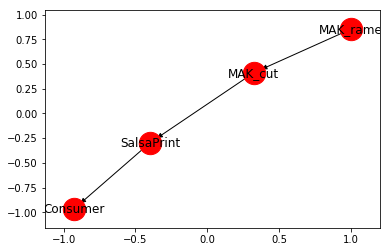

In [7]:
sustain = SupplyChain("sustainable", 2017)
sustain.observe()